In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, random_split

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/pytorch-env/bin/../lib/libjpeg.9.dylib' (no su

In [3]:
# CIFAR10 데이터셋 로드

# train/validation 데이터
cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
train_dataset, val_dataset = random_split(cifar10_dataset, [40000, 10000])

#test 데이터
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# DataLoader (batch 단위로 데이터 공급)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

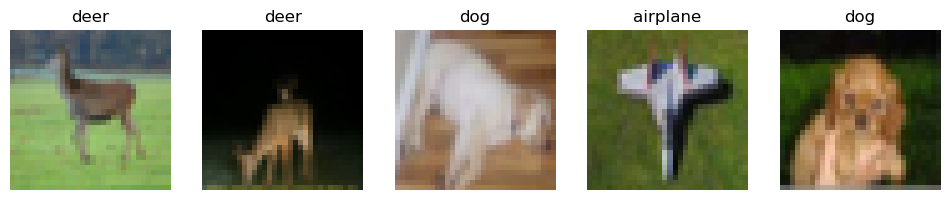

In [5]:
import matplotlib.pyplot as plt

# 데이터 확인: train_loader에서 샘플 몇 개 가져오기
classes = cifar10_dataset.classes  # ['airplane', 'automobile', ..., 'truck']

plt.figure(figsize=(12, 3))
for i in range(5):
    img, label = train_dataset[i]
    np_img = img.numpy().transpose((1, 2, 0))
    plt.subplot(1, 5, i+1)
    plt.imshow(np_img)
    plt.title(classes[label])
    plt.axis('off')
plt.show()


In [6]:
############# TODO: 모델 선언하기 (주의: 이미지 크기 달라짐)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.nn1 = nn.Linear(32 * 32 * 3, 512)
        self.nn2 = nn.Linear(512,128)
        self.nn3 = nn.Linear(128,10)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        out1 = self.nn1(x)
        out2 = self.activation(out1)
        out3 = self.nn2(out2)
        out4 = self.activation(out3)
        out5 = self.nn3(out4)

        return out5

In [7]:
########### 학습 할 때 마다 해당 셀 꼭 다시 실행하기!!!! ###########

############# TODO: 모델 생성, 손실함수, 옵티마이저 정의하기
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [8]:
num_epochs = 5

for epoch in range(num_epochs):
    # ---- Training ----
    model.train()  # 학습 모드
    train_loss, correct = 0, 0
    for images, labels in train_loader:
        outputs = model(images)        ######### TODO: forward pass
        loss = criterion(outputs, labels)           ######### TODO: loss(error) 계산하기
        loss.backward()                ######### TODO: backward pass (backpropagation)
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

    train_acc = correct / len(train_dataset)
    train_loss /= len(train_loader)

    # ---- Validation ----
    model.eval()  # 평가 모드
    val_loss, correct = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)        ######### TODO: forward pass
            loss = criterion(outputs, labels)           ######### TODO: loss(error) 계산하기
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    val_acc = correct / len(val_dataset)
    val_loss /= len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch [1/5] Train Loss: 1.9094, Train Acc: 0.3070 | Val Loss: 1.7499, Val Acc: 0.3661
Epoch [2/5] Train Loss: 1.6998, Train Acc: 0.3925 | Val Loss: 1.6959, Val Acc: 0.3814
Epoch [3/5] Train Loss: 1.6191, Train Acc: 0.4210 | Val Loss: 1.5880, Val Acc: 0.4321
Epoch [4/5] Train Loss: 1.5565, Train Acc: 0.4451 | Val Loss: 1.5763, Val Acc: 0.4334
Epoch [5/5] Train Loss: 1.5230, Train Acc: 0.4540 | Val Loss: 1.5379, Val Acc: 0.4483


In [12]:
# ---- Test ----
model.eval()
test_loss, correct = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)       ######### TODO: forward pass
        loss = criterion(outputs, labels)           ######### TODO: loss(error) 계산하기
        test_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

test_acc = correct / len(test_dataset)
test_loss /= len(test_loader)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 1.5164, Test Accuracy: 0.4596


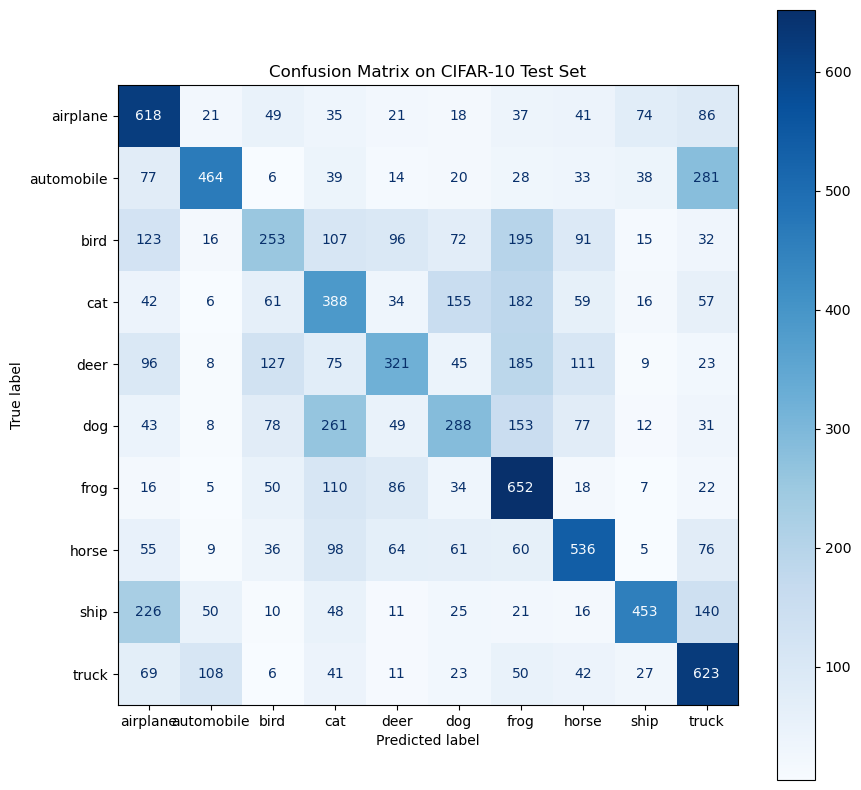

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes = cifar10_dataset.classes  # ['airplane', 'automobile', ..., 'truck']

# 모델 예측 vs 실제 라벨 저장
all_preds, all_labels = [], []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion Matrix 생성
cm = confusion_matrix(all_labels, all_preds)

# 시각화
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix on CIFAR-10 Test Set")
plt.show()
